# Pyber
#### Analyses in README

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)


In [3]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
# Combine the data into a single dataset
combined_data = pd.merge(city_data_df, ride_data_df, on="city")

# Display the data table for preview
combined_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [6]:
# create df for rural data
rural_data = combined_data.loc[combined_data["type"] == "Rural"]
rural_data.head()

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,2018-04-01 09:32:45,21.63,9135979586871
2251,South Jennifer,7,Rural,2018-03-07 19:10:13,48.79,9730627367446
2252,South Jennifer,7,Rural,2018-04-05 14:35:42,32.20,683983658392
2253,South Jennifer,7,Rural,2018-04-02 10:26:50,14.11,3828267773041
2254,South Jennifer,7,Rural,2018-04-10 20:46:11,43.25,623928772332


In [7]:
# create df for suburban data
suburban_data = combined_data.loc[combined_data["type"] == "Suburban"]
suburban_data.head()

,city,driver_count,type,date,fare,ride_id
1625,Port Shane,7,Suburban,2018-04-09 15:34:40,27.66,4022340141966
1626,Port Shane,7,Suburban,2018-04-23 16:05:47,42.26,8341982666719
1627,Port Shane,7,Suburban,2018-03-02 12:06:00,14.95,2803204948363
1628,Port Shane,7,Suburban,2018-03-26 04:33:30,19.03,6010401984537
1629,Port Shane,7,Suburban,2018-03-15 12:09:42,31.58,2552978514662


In [8]:
# create df for urban data
urban_data = combined_data.loc[combined_data["type"] == "Urban"]
urban_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


# Bubble Plot of Ride Sharing Data

In [12]:
# RURAL
# Create a group based on the cities
Rcity_group = rural_data.groupby('city')

# Count how many total rides per city (x-axis)
Rcity_rides = Rcity_group['city'].count()

# Find ave fare per city (y-axis)
Rcity_fare = Rcity_group['fare'].mean()

# Count how many total drivers per city (size)
Rcity_drivers = Rcity_group['driver_count'].mean()


In [10]:
# SUBURBAN
# Create a group based on the cities
Scity_group = suburban_data.groupby('city')

# Count how many total rides per city (x-axis)
Scity_rides = Scity_group['city'].count()

# Find ave fare per city (y-axis)
Scity_fare = Scity_group['fare'].mean()

# Count how many total drivers per city (size)
Scity_drivers = Scity_group['driver_count'].mean()


In [108]:
# URBAN
# Create a group based on the cities
Ucity_group = urban_data.groupby('city')

# Count how many total rides per city (x-axis)
Ucity_rides = Ucity_group['city'].count()

# Find ave fare per city (y-axis)
Ucity_fare = Ucity_group['fare'].mean()

# Count how many total drivers per city (size)
Ucity_drivers = Ucity_group['driver_count'].mean()


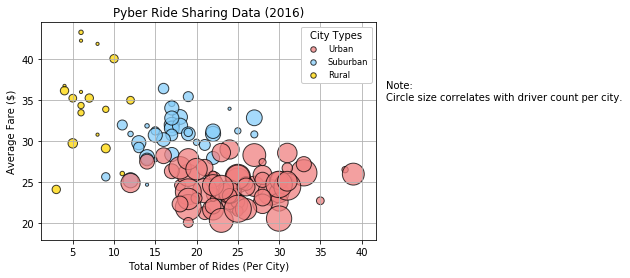

In [109]:
# Obtain the x and y coordinates for each of the three city types

rural = plt.scatter(Rcity_rides, Rcity_fare, s=Rcity_drivers*10, marker="o", alpha=0.75, c="gold", edgecolors="black", label="Rural")

suburban = plt.scatter(Scity_rides, Scity_fare, s=Scity_drivers*10, marker="o", alpha=0.75, c="lightskyblue", edgecolors="black", label="Suburban")

urban = plt.scatter(Ucity_rides, Ucity_fare, s=Ucity_drivers*10, marker="o", alpha=0.75, c="lightcoral", edgecolors="black", label="Urban")

# Build the scatter plots for each city types
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
legend = plt.legend(handles=[urban, suburban, rural], loc="best", fontsize="small", framealpha=1, title="City Types")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(43, 35, 'Note: \nCircle size correlates with driver count per city.')

# Save Figure
plt.savefig("PyberPlot.png")

# Show plot
plt.show()

# Total Fares by City Type

In [110]:
# Calculate Type Percents
# find total fare
total_fare = combined_data['fare'].sum()

# Create a group based on the city type
type_group = combined_data.groupby('type')

# Find total fares by type
type_fares = type_group['fare'].sum()

# Find percent fares by type
percent_fares = round((type_fares / total_fare *100), 2)

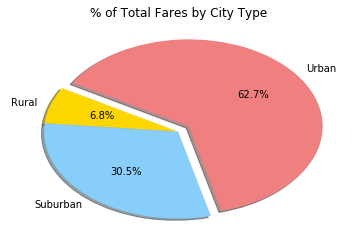

In [111]:
# Build Pie Chart
type_labels = ["Rural", "Suburban", "Urban"]
explode = [0, 0, 0.1]

plt.pie(percent_fares, explode=explode, labels=type_labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("TotalFares.png")

# Show Figure
plt.show()

# Total Rides by City Type

In [112]:
# Calculate Ride Percents
# find total rides
total_rides = combined_data['ride_id'].count()

# Find total rides by type
type_rides = type_group['ride_id'].count()

# Find percent rides by type
percent_rides = round((type_rides / total_rides *100), 2)

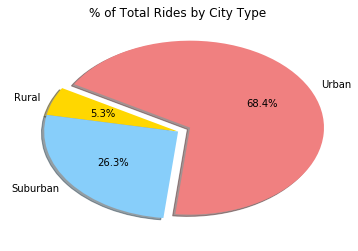

In [113]:
# Build Pie Chart
plt.pie(percent_rides, explode=explode, labels=type_labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("TotalFares.png")

# Show Figure
plt.show()

# Total Drivers by City Type

In [114]:
# remove duplicate city data to have one row per city
no_dup = combined_data.drop_duplicates(subset=['city'])
no_dup.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
28,Williamsstad,59,Urban,2018-01-23 17:51:24,19.62,125986195523
51,Port Angela,67,Urban,2018-04-17 06:23:18,16.34,7120534266772
70,Rodneyfort,34,Urban,2018-02-10 23:22:03,23.44,5149245426178
93,West Robert,39,Urban,2018-02-15 04:21:47,12.28,1442502460354


In [115]:
# Calculate Driver Percents
# find total drivers
total_drivers = no_dup['driver_count'].sum()

# group by type
no_dup_group = no_dup.groupby('type')

# Find total Drivers by type
type_drivers = no_dup_group['driver_count'].sum()

# Find percent Drivers by type
percent_drivers = round((type_drivers / total_drivers *100), 2)

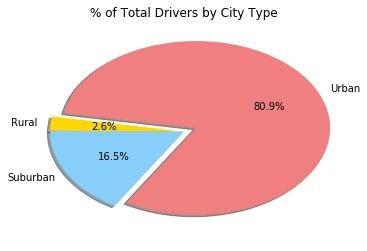

In [116]:
# Build Pie Chart
plt.pie(percent_drivers, explode=explode, labels=type_labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=170)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("TotalFares.png")

# Show Figure
plt.show()